In [30]:
import importlib
import numpy as np
from tensorflow.keras import layers, losses
import tensorflow as tf
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import autoencoder as ae
import measure_latent as ml

importlib.reload(ml)
importlib.reload(ae)

def dataset_path(name, opacity, radius, pixel_size, grid_size):
	return "_".join([name, str(opacity), str(radius), str(pixel_size), str(grid_size)])


In [2]:
dataset_size = 10000
pixel_size = 1024
grid_size = 64
radius = 15
opacity = 0.2
pca_path = f"./random_clusters/{dataset_path('digitspca', opacity, radius, pixel_size, grid_size)}"
tsne_path = f"./random_clusters/{dataset_path('digitstsne', opacity, radius, pixel_size, grid_size)}"

pca_train_set = np.empty(shape=(dataset_size, grid_size, grid_size))
for i in range(dataset_size):
	curr = np.load(f"{pca_path}/{str(i)}.npy")
	pca_train_set[i, :, :] = curr[:, :]

tsne_train_set = np.empty(shape=(dataset_size, grid_size, grid_size))
for i in range(dataset_size):
	curr = np.load(f"{tsne_path}/{str(i)}.npy")
	tsne_train_set[i, :, :] = curr[:, :]

In [13]:
with tf.device('/device:GPU:1'):
	pca_autoencoder = ae.ClusterAutoEncoder(grid_size=64, latent_dim=8)
	pca_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
	pca_autoencoder.fit(pca_train_set, pca_train_set, epochs=10, shuffle=True,)

	tsne_autoencoder = ae.ClusterAutoEncoder(grid_size=64, latent_dim=8)
	tsne_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
	tsne_autoencoder.fit(tsne_train_set, tsne_train_set, epochs=10, shuffle=True,)

Epoch 1/10
313/313 [==============================] - 4s 11ms/step - loss: 0.0223
Epoch 2/10
313/313 [==============================] - 3s 11ms/step - loss: 0.0069
Epoch 3/10
313/313 [==============================] - 3s 11ms/step - loss: 0.0056
Epoch 4/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0050
Epoch 5/10
313/313 [==============================] - 3s 11ms/step - loss: 0.0046
Epoch 6/10
313/313 [==============================] - 3s 11ms/step - loss: 0.0044
Epoch 7/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0042
Epoch 8/10
313/313 [==============================] - 3s 11ms/step - loss: 0.0041
Epoch 9/10
313/313 [==============================] - 4s 11ms/step - loss: 0.0040
Epoch 10/10
313/313 [==============================] - 3s 11ms/step - loss: 0.0039
Epoch 1/10
313/313 [==============================] - 4s 10ms/step - loss: 0.0112
Epoch 2/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0043
Epoch 3/10
313/

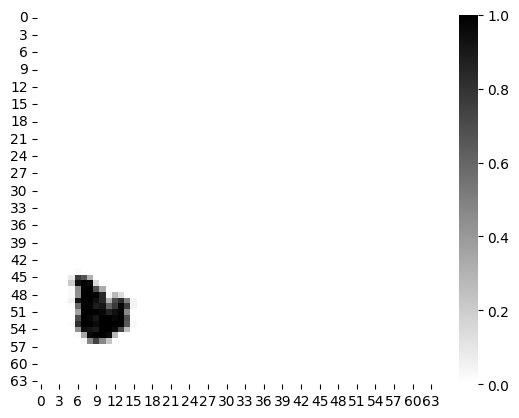

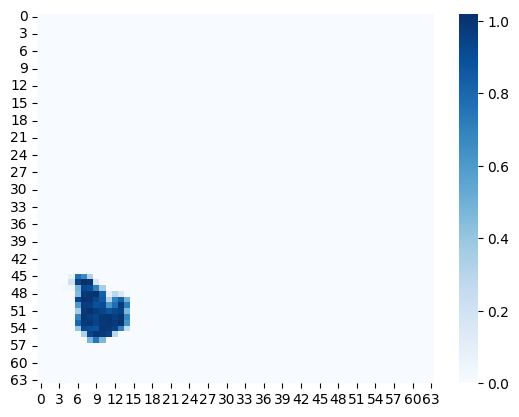

In [23]:
## reconstruction test
index =4001
with tf.device('/device:GPU:1'):
	decoded = tsne_autoencoder.call(tsne_train_set[index:index+1])[0].numpy()

original = tsne_train_set[index]
sns.heatmap(original, cmap='binary')
plt.show()

decoded = decoded.reshape(grid_size, grid_size)
sns.heatmap(decoded, cmap='Blues')
plt.show()

In [19]:
with tf.device('/device:GPU:1'):

	print("extracting latent...")
	tsne_latent = tsne_autoencoder.encoder(tsne_train_set).numpy()
	pca_latent = pca_autoencoder.encoder(pca_train_set).numpy()

	# print("performing tsne...")
	tsne_latent_2d = TSNE(n_components=2).fit_transform(tsne_latent)
	pca_latent_2d = TSNE(n_components=2).fit_transform(pca_latent)

	print("plotting...")


extracting latent...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


plotting...


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


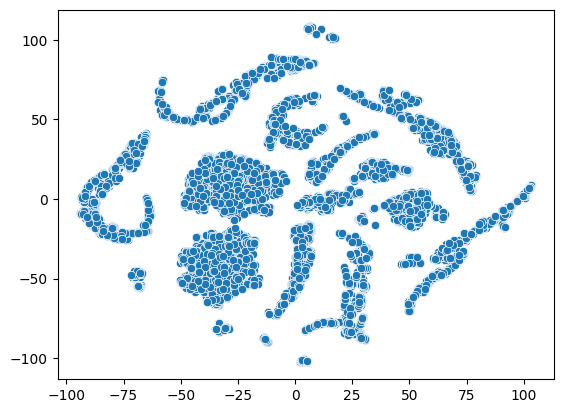

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


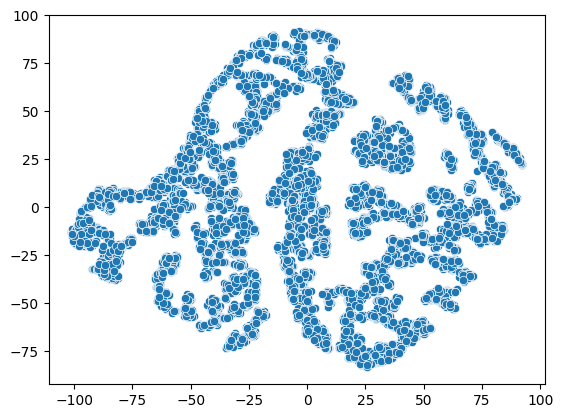

In [20]:
	sns.scatterplot(tsne_latent_2d[:, 0], tsne_latent_2d[:, 1])
	plt.show()
	sns.scatterplot(pca_latent_2d[:, 0], pca_latent_2d[:, 1])
	plt.show()
	

In [31]:

print(ml.measure_latent(tsne_latent))
print(ml.measure_latent(pca_latent))

0.71155846
0.40388808
